# 洪水検知トライアルデータ解析プロジェクト
### 八千代エンジニヤリング株式会社 

### カラムについて
- 全ファイル共通で、カラムのインデックスは以下になります．
- 月日，時刻，流域平均雨量（mm/h），貯水量（×10^3m3），流入量(m3/s)，放流量(m3/s)，貯水率(％)

<!-- ### データ格納場所: 
https://drive.google.com/drive/folders/1FLDLh7PytQwttwzA-fImAX1pDoP4nFP5 -->

![tmp.png](tmp.png)

In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plt.rcParams['font.family'] = 'Hiragino Maru Gothic Pro'

In [186]:
data_root = 'Japan'
file_list = os.listdir(data_root)
all_df = pd.DataFrame(columns={'place', 'date', 'hour', 'inflow'})
for file_name in file_list[:10]:
    file_all_df = pd.read_csv(data_root + '/' + file_name, encoding="SHIFT-JIS", header=None)\
    .iloc[:, [1, 2, 5]]\
    .rename(columns={1: 'date', 2: 'hour', 5: 'inflow'})
    file_all_df['place'] = file_name.split('_')[1]
    all_df = pd.concat([all_df, file_all_df])
    
all_df['inflow'].replace('-', None, inplace=True)
all_df['inflow'].replace('欠測', None, inplace=True)
all_df['inflow'].replace('閉局', None, inplace=True)
all_df['inflow'] = all_df['inflow'].astype('float')

In [187]:
hour_int_series = all_df['hour'].str.split(':').str[0].astype(int) - 1
hour_str_series = hour_int_series.astype(str).str.zfill(2)
all_df['datetime'] = pd.to_datetime(all_df['date'] + ' ' + hour_str_series, format='%Y/%m/%d %H:')

In [188]:
df = all_df[all_df['place'] == 'Kasegawa'].dropna()
df.head()

,inflow,place,date,hour,datetime
95153,2.01,Kasegawa,2012/11/08,18:00,2012-11-08 17:00:00
95154,1.99,Kasegawa,2012/11/08,19:00,2012-11-08 18:00:00
95155,1.98,Kasegawa,2012/11/08,20:00,2012-11-08 19:00:00
95156,1.99,Kasegawa,2012/11/08,21:00,2012-11-08 20:00:00
95157,2.00,Kasegawa,2012/11/08,22:00,2012-11-08 21:00:00


In [189]:
target_df = df[(df['datetime'] > '2020-12-29')]

## リアルタイム

In [190]:
trend = []
window = 24 * 2
quantile = 0.5
to_ix = window
while to_ix <= target_df.shape[0]:
    to_ix += 1
    from_ix = to_ix - window
    trend.append(np.quantile(target_df['inflow'].iloc[from_ix: to_ix], 0.5))
    
trend = np.array(trend)
target_df['trend'] = np.append(trend, np.zeros(window - 1))

<ipython-input-190-68056a34abc4>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_df['trend'] = np.append(trend, np.zeros(window - 1))


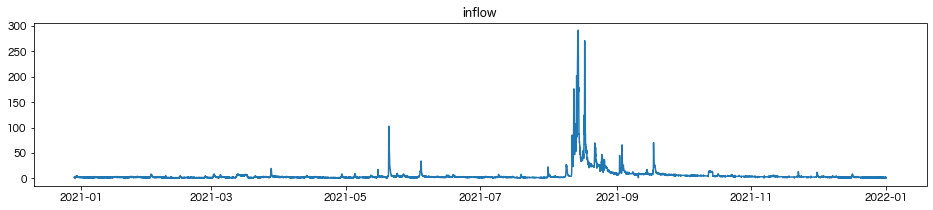

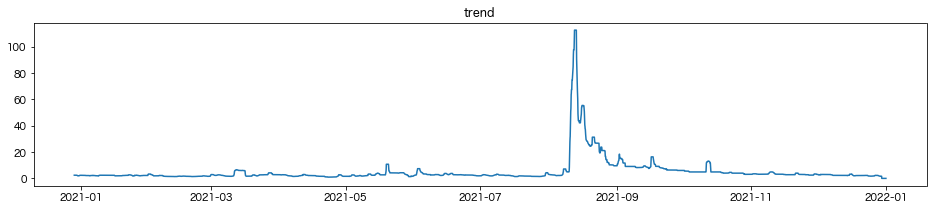

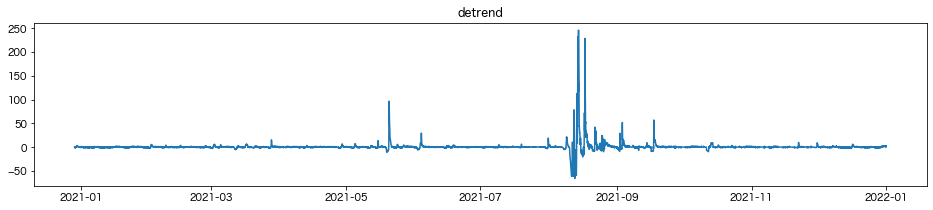

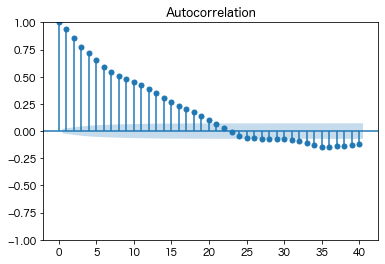

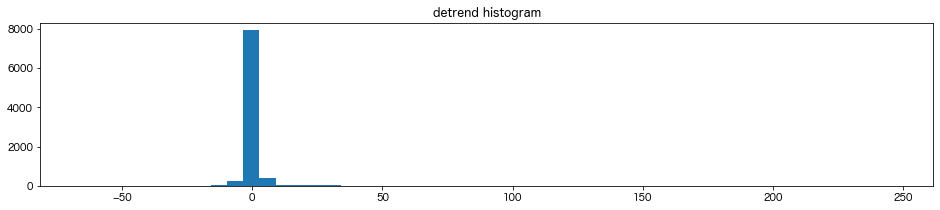

In [191]:
fig, ax = plt.subplots(figsize=[16, 3])
ax.plot(target_df['datetime'], target_df['inflow'])
ax.set_title('inflow')
plt.show()
fig, ax = plt.subplots(figsize=[16, 3])
ax.plot(target_df['datetime'], target_df['trend'])
ax.set_title('trend')
plt.show()
fig, ax = plt.subplots(figsize=[16, 3])
ax.plot(target_df['datetime'], target_df['inflow'] - target_df['trend'])
ax.set_title('detrend')
plt.show()
plot_acf(target_df['inflow'] - target_df['trend'])
plt.show()
fig, ax = plt.subplots(figsize=[16, 3])
ax.hist(target_df['inflow'] - target_df['trend'], bins=50)
# ax.set_yscale('log')
ax.set_title('detrend histogram')
plt.show()

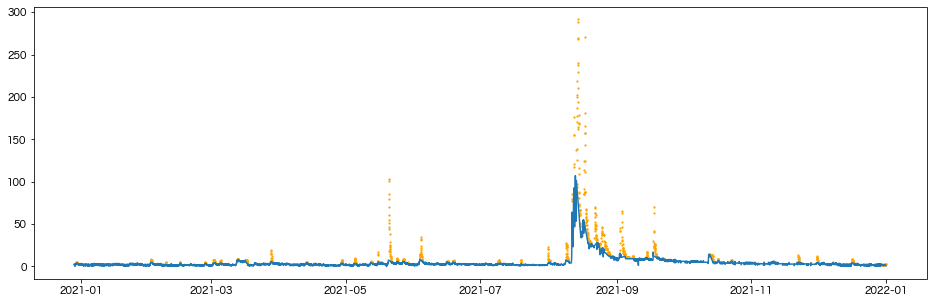

In [192]:
flood_cond = target_df['inflow'] - target_df['trend'] > 2
fig, ax = plt.subplots(figsize=[16, 5])
ax.scatter(target_df[flood_cond]['datetime'], target_df[flood_cond]['inflow'], color='orange', s=1.5)
ax.plot(target_df[flood_cond==False]['datetime'], target_df[flood_cond==False]['inflow'])
plt.show()

<ipython-input-196-e1331d4e6552>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_df['trend'] = np.append(trend, np.zeros(window - 1))


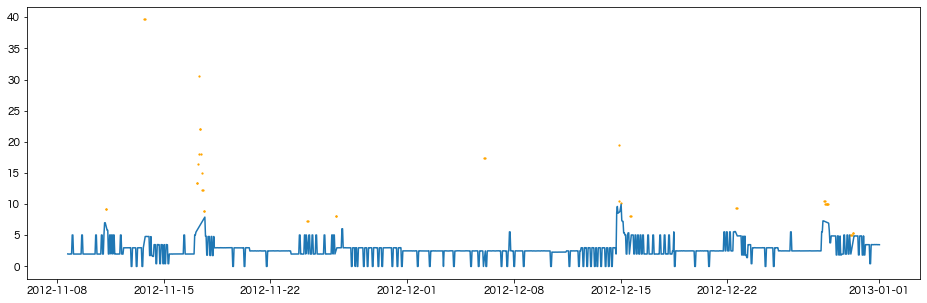

<ipython-input-196-e1331d4e6552>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_df['trend'] = np.append(trend, np.zeros(window - 1))


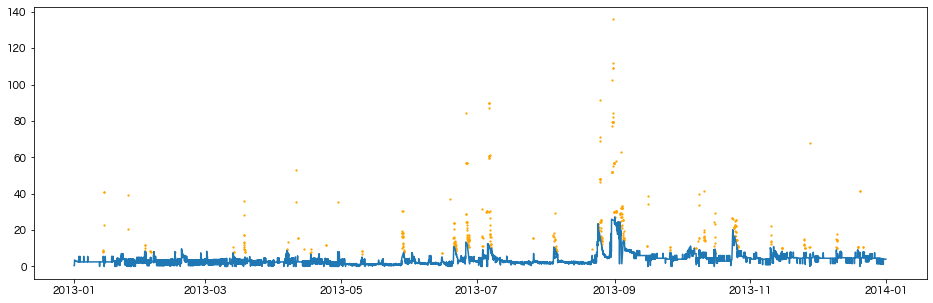

<ipython-input-196-e1331d4e6552>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_df['trend'] = np.append(trend, np.zeros(window - 1))


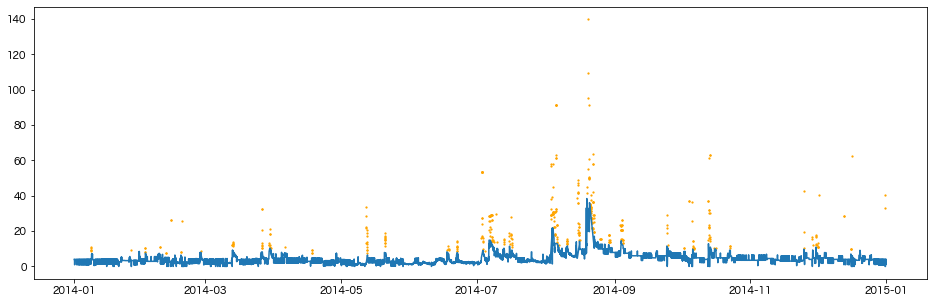

<ipython-input-196-e1331d4e6552>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_df['trend'] = np.append(trend, np.zeros(window - 1))


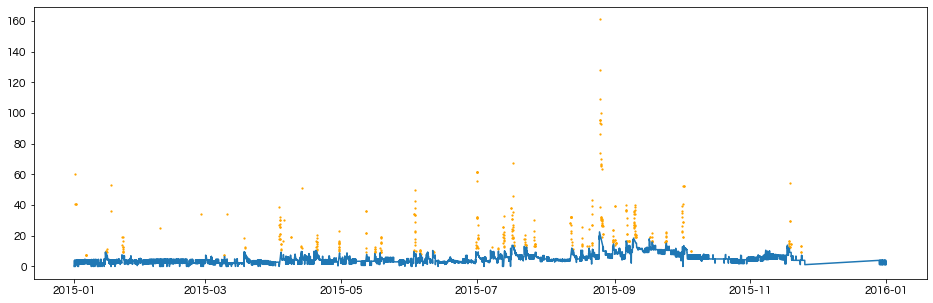

<ipython-input-196-e1331d4e6552>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_df['trend'] = np.append(trend, np.zeros(window - 1))


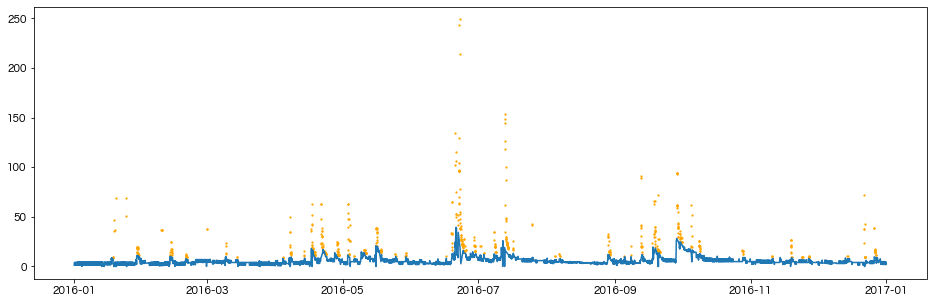

<ipython-input-196-e1331d4e6552>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_df['trend'] = np.append(trend, np.zeros(window - 1))


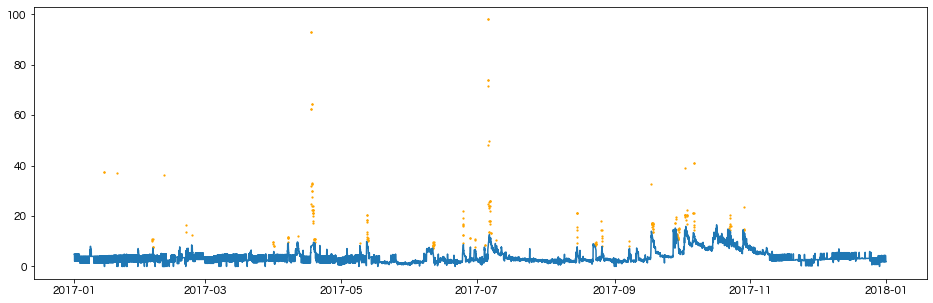

<ipython-input-196-e1331d4e6552>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_df['trend'] = np.append(trend, np.zeros(window - 1))


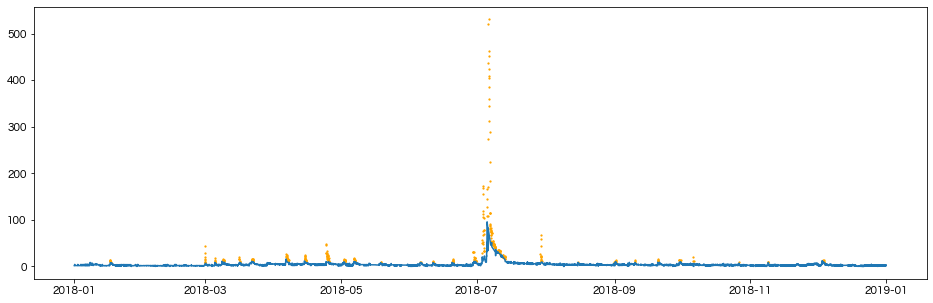

<ipython-input-196-e1331d4e6552>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_df['trend'] = np.append(trend, np.zeros(window - 1))


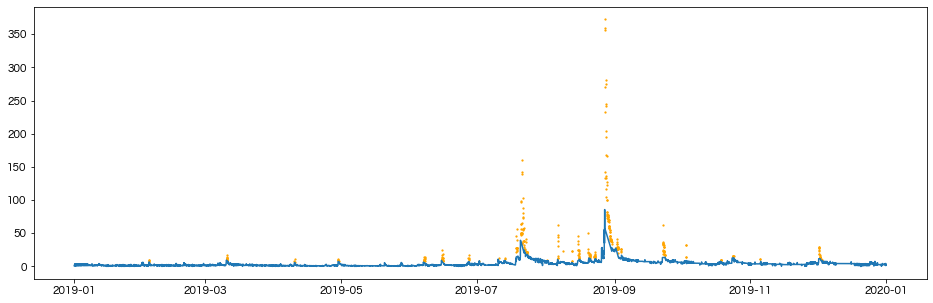

<ipython-input-196-e1331d4e6552>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_df['trend'] = np.append(trend, np.zeros(window - 1))


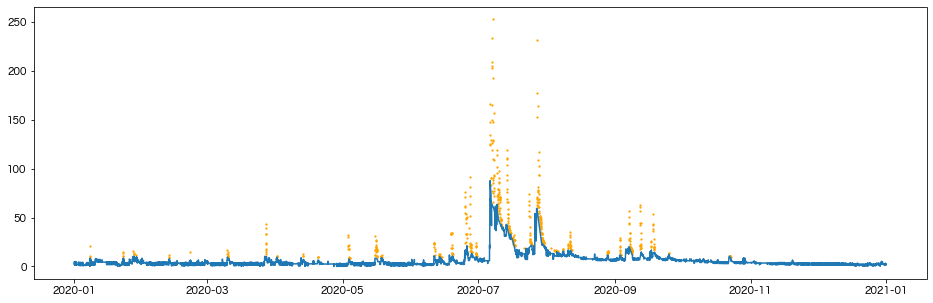

In [196]:
for year in range(2012, 2021, 1):
    start_date = str(year) + '-01-01'
    end_date = str(year + 1) + '-01-01'
    target_df = df[(df.datetime > start_date) & (df.datetime <= end_date)]

    trend = []
    window = 24 * 2
    quantile = 0.5
    to_ix = window
    while to_ix <= target_df.shape[0]:
        to_ix += 1
        from_ix = to_ix - window
        trend.append(np.quantile(target_df['inflow'].iloc[from_ix: to_ix], 0.5))

    trend = np.array(trend)
    target_df['trend'] = np.append(trend, np.zeros(window - 1))
    
    flood_cond = target_df['inflow'] - target_df['trend'] > 5
    fig, ax = plt.subplots(figsize=[16, 5])
    ax.scatter(target_df[flood_cond]['datetime'], target_df[flood_cond]['inflow'], color='orange', s=1.5)
    ax.plot(target_df[flood_cond==False]['datetime'], target_df[flood_cond==False]['inflow'])
    plt.show()

In [197]:
target_df[flood_cond].sort_values('inflow')

,inflow,place,date,hour,datetime,trend
158069,8.52,Kasegawa,2020/02/12,21:00,2020-02-12 20:00:00,3.480
160021,8.87,Kasegawa,2020/05/04,05:00,2020-05-04 04:00:00,3.470
160020,8.87,Kasegawa,2020/05/04,04:00,2020-05-04 03:00:00,3.475
160017,8.88,Kasegawa,2020/05/04,01:00,2020-05-04 00:00:00,3.485
160019,8.89,Kasegawa,2020/05/04,03:00,2020-05-04 02:00:00,3.480
...,...,...,...,...,...,...
161562,205.32,Kasegawa,2020/07/07,10:00,2020-07-07 09:00:00,59.960
161563,208.70,Kasegawa,2020/07/07,11:00,2020-07-07 10:00:00,57.310
162054,232.03,Kasegawa,2020/07/27,22:00,2020-07-27 21:00:00,51.175
161561,233.97,Kasegawa,2020/07/07,09:00,2020-07-07 08:00:00,63.545


## オフライン

In [198]:
trend = []
window = 24 * 2
quantile = 0.5
to_ix = int(window / 2)
while to_ix <= target_df.shape[0]:
    to_ix += 1
    from_ix = int(to_ix - window)
    if from_ix < 0:
        continue
    trend.append(np.quantile(target_df['inflow'].iloc[from_ix: to_ix], 0.5))

In [199]:
trend = np.array(trend)
tail_trend = np.append(np.zeros(int(window / 2) - 1), trend)
full_trend = np.append(tail_trend, np.zeros(int(window / 2) - 1))
target_df['trend'] = full_trend

<ipython-input-199-02e9c5ce1dda>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_df['trend'] = full_trend


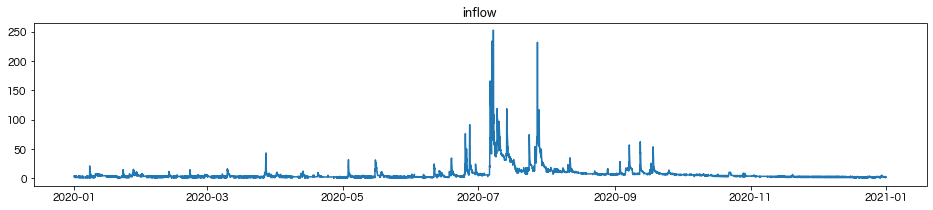

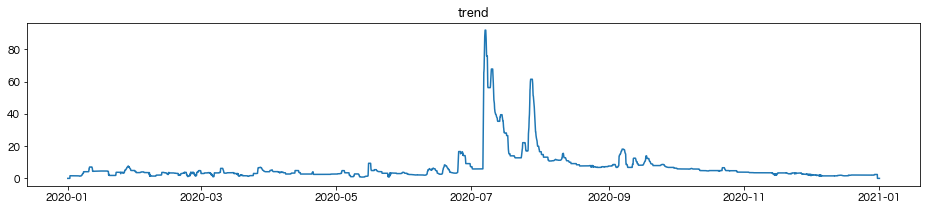

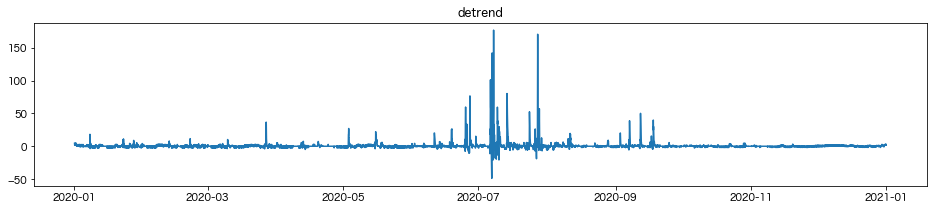

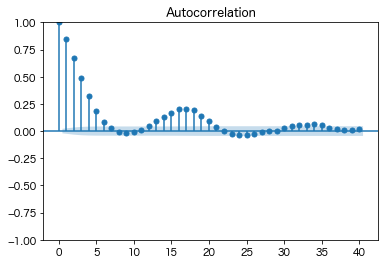

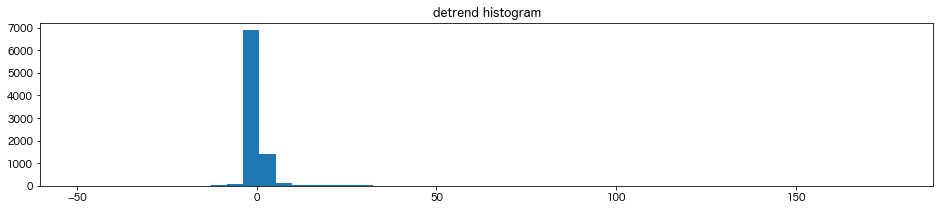

In [200]:
fig, ax = plt.subplots(figsize=[16, 3])
ax.plot(target_df['datetime'], target_df['inflow'])
ax.set_title('inflow')
plt.show()
fig, ax = plt.subplots(figsize=[16, 3])
ax.plot(target_df['datetime'], target_df['trend'])
ax.set_title('trend')
plt.show()
fig, ax = plt.subplots(figsize=[16, 3])
ax.plot(target_df['datetime'], target_df['inflow'] - target_df['trend'])
ax.set_title('detrend')
plt.show()
plot_acf(target_df['inflow'] - target_df['trend'])
plt.show()
fig, ax = plt.subplots(figsize=[16, 3])
ax.hist(target_df['inflow'] - target_df['trend'], bins=50)
# ax.set_yscale('log')
ax.set_title('detrend histogram')
plt.show()

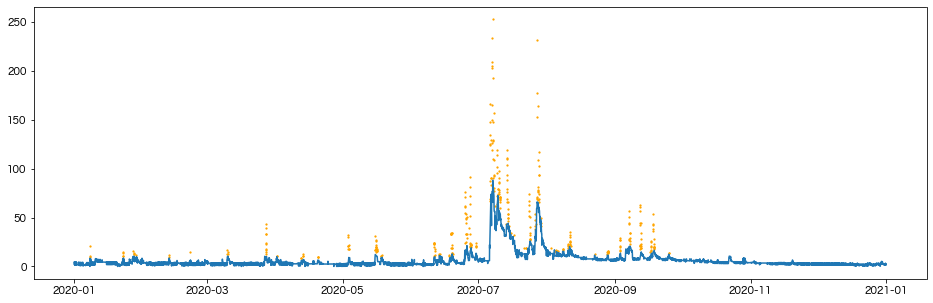

In [201]:
flood_cond = target_df['inflow'] - target_df['trend'] > 5
fig, ax = plt.subplots(figsize=[16, 5])
ax.scatter(target_df[flood_cond]['datetime'], target_df[flood_cond]['inflow'], color='orange', s=1.5)
ax.plot(target_df[flood_cond==False]['datetime'], target_df[flood_cond==False]['inflow'])
plt.show()

<ipython-input-204-6bb0fafd1c68>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_df['trend'] = full_trend


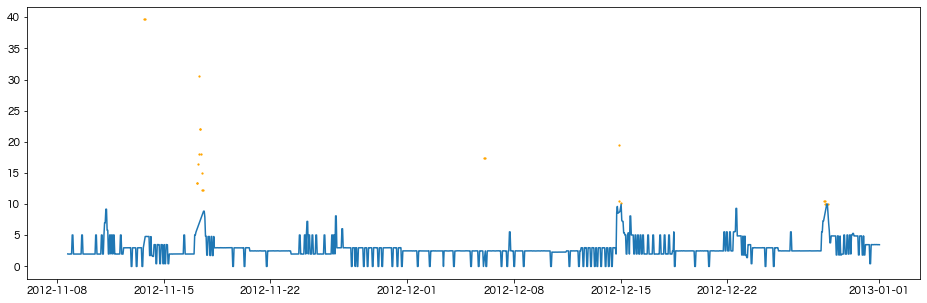

<ipython-input-204-6bb0fafd1c68>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_df['trend'] = full_trend


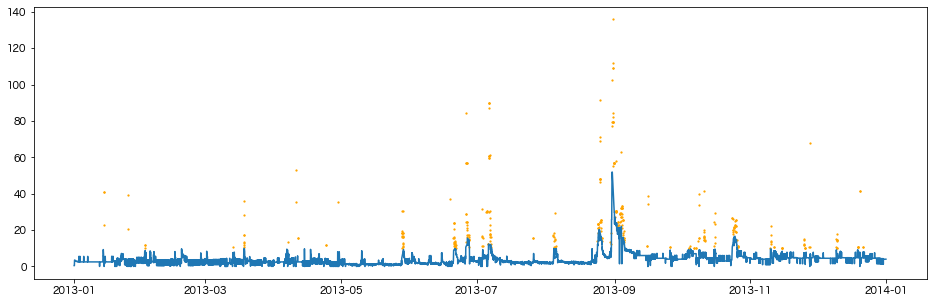

<ipython-input-204-6bb0fafd1c68>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_df['trend'] = full_trend


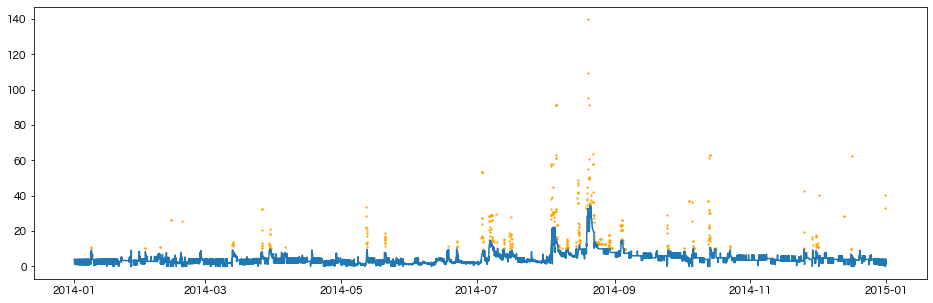

<ipython-input-204-6bb0fafd1c68>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_df['trend'] = full_trend


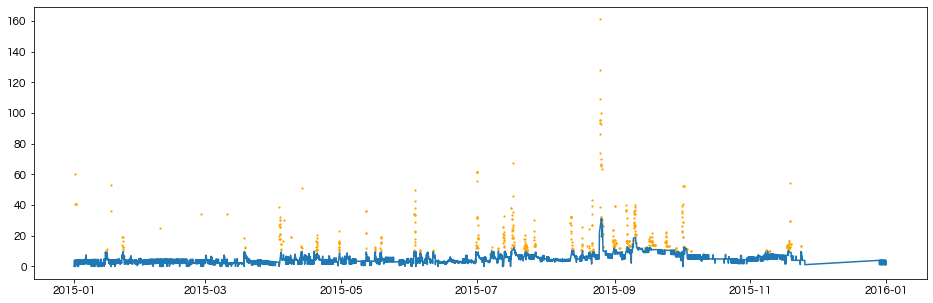

<ipython-input-204-6bb0fafd1c68>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_df['trend'] = full_trend


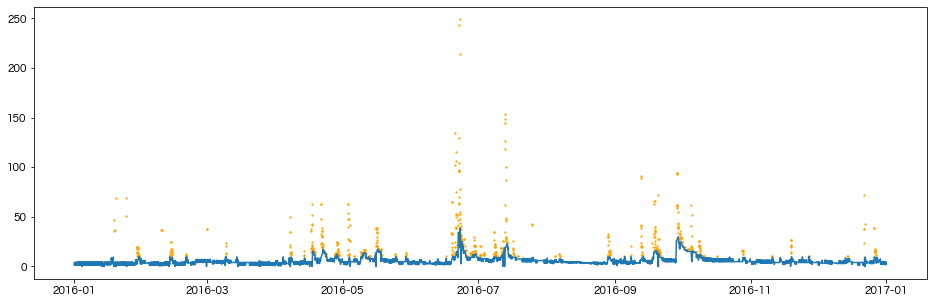

<ipython-input-204-6bb0fafd1c68>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_df['trend'] = full_trend


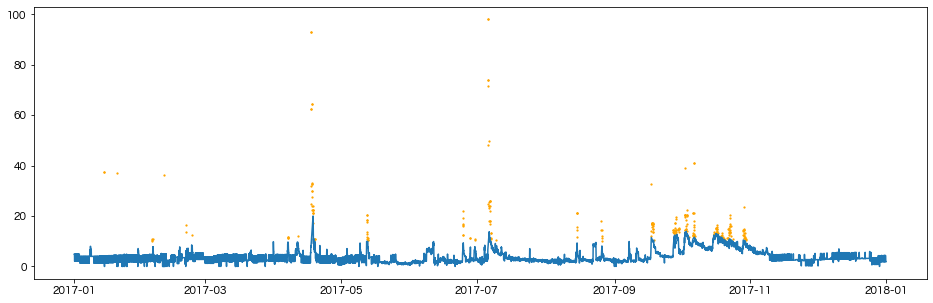

<ipython-input-204-6bb0fafd1c68>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_df['trend'] = full_trend


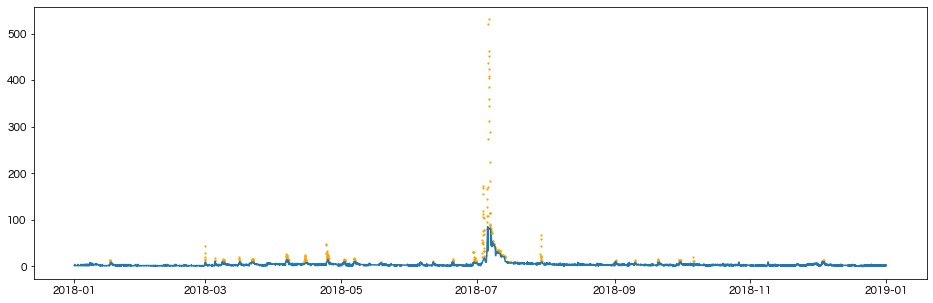

<ipython-input-204-6bb0fafd1c68>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_df['trend'] = full_trend


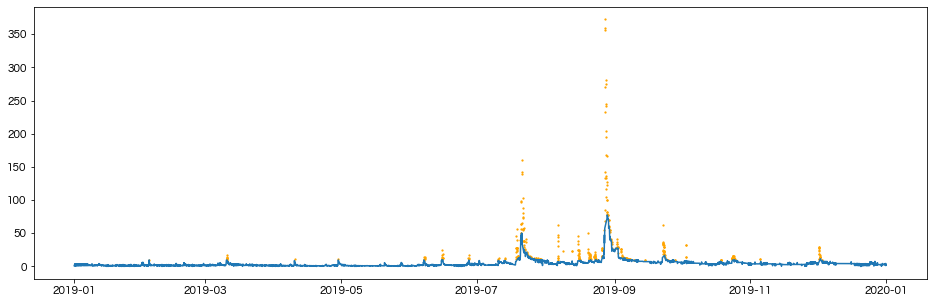

<ipython-input-204-6bb0fafd1c68>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_df['trend'] = full_trend


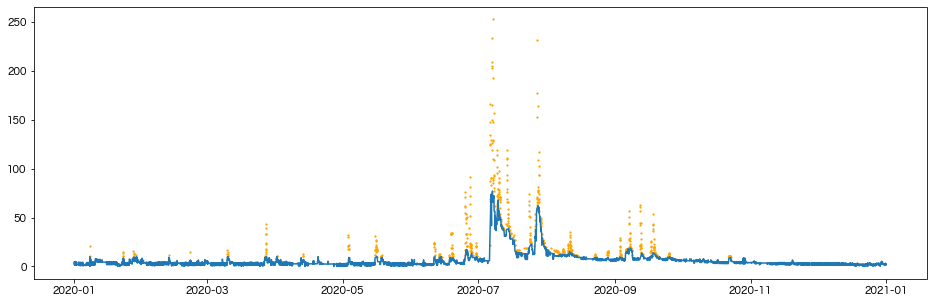

In [204]:
for year in range(2012, 2021, 1):
    start_date = str(year) + '-01-01'
    end_date = str(year + 1) + '-01-01'
    target_df = df[(df.datetime > start_date) & (df.datetime <= end_date)]

    trend = []
    window = 24 * 2
    quantile = 0.5
    to_ix = int(window / 2)
    while to_ix <= target_df.shape[0]:
        to_ix += 1
        from_ix = int(to_ix - window)
        if from_ix < 0:
            continue
        trend.append(np.quantile(target_df['inflow'].iloc[from_ix: to_ix], 0.5))

    trend = np.array(trend)
    tail_trend = np.append(np.zeros(int(window / 2) - 1), trend)
    full_trend = np.append(tail_trend, np.zeros(int(window / 2) - 1))
    target_df['trend'] = full_trend
    
    flood_cond = (target_df['inflow'] - target_df['trend'] > 1) & (target_df['inflow'] > 10)
    fig, ax = plt.subplots(figsize=[16, 5])
    ax.scatter(target_df[flood_cond]['datetime'], target_df[flood_cond]['inflow'], color='orange', s=1.5)
    ax.plot(target_df[flood_cond==False]['datetime'], target_df[flood_cond==False]['inflow'])
    plt.show()